**Which of the following do you think is an example of time series? Even if you don’t know, try making a guess.**

<img src="img/timeSeriesDemo.jpg"> 

``Time Series is generally data which is collected over time and is dependent on it.``

Here we see that the count of cars is independent of time, hence it is not a time series. While the CO2 level increases with respect to time, hence it is a time series.

A series of data points collected in time order is known as a time series. ``Most of business houses work on time series data`` to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc. Data of a time series can be used for forecasting.

``What is time series?``
--

> Time series is a collection of data points that are collected at constant time intervals.

> It is time dependent.

> Most of time series have some form of ``seasonality trends``. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends.

> Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.

> ``Examples``:  What do these applications have in common: predicting the electricity consumption of a household for the next three months, estimating traffic on roads at certain periods, and predicting the price at which a stock will trade on the New York Stock Exchange?

> They all fall under the concept of time series data! You cannot accurately predict any of these results without the ‘time’ component. And as more and more data is generated in the world around us, time series forecasting keeps becoming an ever more critical technique for a data scientist to master.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

import warnings
warnings.filterwarnings('ignore')

Let us visualise a some data :
--

Let us visualise some data to understand **``Time Series Data``**

In [5]:
# we are loading dataset : weather conditions in world war 2
# Summary_of_Weather.csv
# It includes measured min, max and mean temperatures from weather stations.

# This is very large dataset. You may get "Low memory" warning
# to suppress the low_memory warning keep it false
weather_df = pd.read_csv("C:\Program Files/Python36/suven/Data Anaylsis/Dataset/Summary_of_Weather.csv", low_memory=False)
weather_df.shape

(119040, 31)

**``Important columns in weather_df :``**

STA: weather station number (WBAN)

Date: Date of temperature measurement

MeanTemp: Mean temperature

In [3]:
weather_df.head(1)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# data cleaning : get only those columns from weather_df, which we intend to use. 
# what we will use only
weather = weather_df.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


**``Information Given``** : Lets accept this and move on :

1. In this World War dataset,  Lets focus USA and BURMA war

2. In this war USA bomb BURMA( KATHA city) from 1942 to 1945.

3. The closest weather station to this war is ``BINDUKURI`` and it has temperature record from 1943 to 1945.

4. Now lets visualize this situation. But before visualization, we need to make **date** features ->  **date time object**.

5. ``BINDUKURI`` weather station Id i.e weather.STA is ``32907``

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
STA         751 non-null int64
Date        751 non-null object
MeanTemp    751 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.5+ KB
None
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
STA         751 non-null int64
Date        751 non-null datetime64[ns]
MeanTemp    751 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.5 KB
None


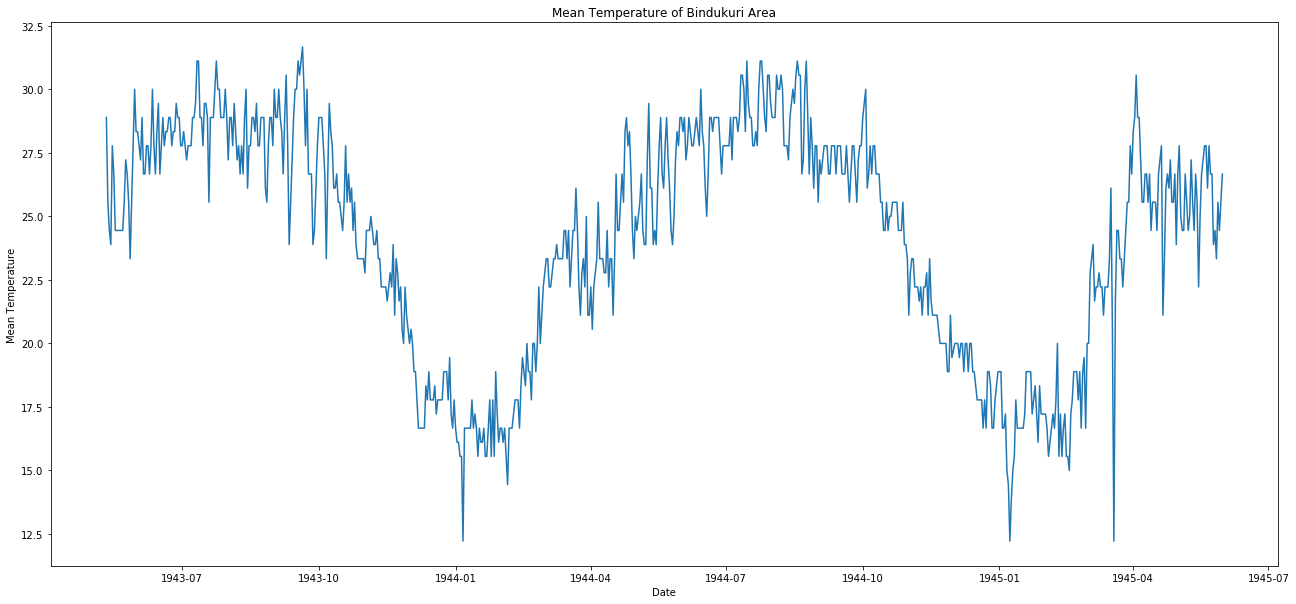

In [9]:
# understand the code and see the Time Series o/p

weather_bin = weather.loc[weather.STA == 32907]
# print(weather_bin.info())
# print("---------------------------------------------------")
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
# print(weather_bin.info())

plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show();

1. Above plotting is of **Time Series data. ( as it is Time-dependent )**

2. As you can see, we have temperature measurement from 1943 to 1945.

3. Temperature ossilates between 12 and 32 degrees.

4. Temperature of winter months is colder than temperature of summer months.

**Now, let's get used to some simple programming concepts like :**

1. DatetimeIndex and its use in time-series data
2. Creating time-series with specific frequencies
3. Representation of intervals of time user periods
4. Shifting and lagging time-series data
5. Frequency conversion of time-series data
6. Upsampling and downsampling of time-series data

In [11]:
import datetime
from datetime import datetime

1. ``DatetimeIndex and its use in time-series data``

Specific dates and times in pandas are represented using the pandas **Timestamp** class. Timestamp is based on NumPy's dtype datetime64 and has higher precision than Python's built-in datetime object. This increased precision is frequently required for accurate financial calculations.

**Sequences of timestamp objects** are represented by pandas as a ``DatetimeIndex``, which is a type of pandas index that is optimized for indexing by dates and times.

In [13]:
dates = [datetime(2019, 9, 8), datetime(2019, 10, 3)]
dti = pd.DatetimeIndex(dates)
dti

DatetimeIndex(['2019-09-08', '2019-10-03'], dtype='datetime64[ns]', freq=None)

A Series will also automatically construct a DatetimeIndex as its index when
passing a list of datetime objects as the index parameter:

In [14]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(2), dti) #Rule : len(values) == len(Indexes)
print(type(ts.index))
print("-----------------------------")
print(ts)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
-----------------------------
2019-09-08    0.469112
2019-10-03   -0.282863
dtype: float64


The Series object has taken the datetime objects and constructed a DatetimeIndex from the date values, where each value of the DatetimeIndex is a Timestamp object, and each element of the index can be used to access the corresponding value in the Series object.

In [11]:
# ex : 1 : of accessing data 
print(ts[datetime(2019, 9, 8)])


# ex : 2 : of accessing data 
print(ts['2019-10-3'])

0.4691122999071863
-0.2828633443286633


The Series object can also create a DatetimeIndex when passing a list of
strings, which pandas will gladly recognize as dates and perform the appropriate conversions:

In [16]:
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']

ts = pd.Series(np.random.randn(2), dates)
ts

<class 'list'>


2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

**pd.to_datetime() function**
> pd.to_datetime() function is used to perform a conversion of a list of potentially mixed type items into a DatetimeIndex:

In [13]:
dti = pd.to_datetime(['Aug 1, 2019', '2019-08-02', '2019.8.3', None])
dti

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', 'NaT'], dtype='datetime64[ns]', freq=None)

Notice that ``None`` is converted into a ``not-a-time value, NaT``, which
represents that the source data could not be converted into datetime.

**``Be Careful``**  : 
If pd.to_datetime() function fails to parse a value, it produces **'TypeError'**

for Ex : *dti2 = pd.to_datetime(['Aug 1, 2019', 'Jan'])* will produce **TypeError**

The pandas default is that ``date strings are always month first``. If you need to parse dates with the day as the first component, you can use the **dayfirst=True** option, which can be useful as data can often have day first, particularly when it is non-U.S. data.

In [31]:
# both indicate 1st Aug 2019
dti1 = pd.to_datetime(['8/1/2019'])
dti2 = pd.to_datetime(['1/8/2019'], dayfirst=True)
print(dti1[0], dti2[0])


2019-08-01 00:00:00 2019-08-01 00:00:00


In [19]:
np.random.seed(123456)
dates = pd.date_range('8/1/2019', periods=10)
s1 = pd.Series(np.random.randn(10), dates)
s1

2019-08-01    0.469112
2019-08-02   -0.282863
2019-08-03   -1.509059
2019-08-04   -1.135632
2019-08-05    1.212112
2019-08-06   -0.173215
2019-08-07    0.119209
2019-08-08   -1.044236
2019-08-09   -0.861849
2019-08-10   -2.104569
Freq: D, dtype: float64

2. ``Creating time-series with specific frequencies``

Time-series data in pandas can also be created to represent intervals of time other than daily frequency. Different frequencies can be generated with pd.date_range() by utilizing the freq parameter. **This parameter defaults to a value of D**, which represents daily frequency.

**To introduce the creation of nondaily frequencies, the following command creates a DatetimeIndex with one-minute intervals using freq='T':**

In [20]:
bymin = pd.Series(np.arange(0, 90*60*24), pd.date_range('2019-08-01', '2019-10-29 23:59:00',freq='T'))

bymin[:10]

2019-08-01 00:00:00    0
2019-08-01 00:01:00    1
2019-08-01 00:02:00    2
2019-08-01 00:03:00    3
2019-08-01 00:04:00    4
2019-08-01 00:05:00    5
2019-08-01 00:06:00    6
2019-08-01 00:07:00    7
2019-08-01 00:08:00    8
2019-08-01 00:09:00    9
Freq: T, dtype: int32

This time-series allows us to use forms of slicing at finer resolution. 

Earlier, we saw slicing at day or month levels, but now we have a time-series with minute-based data that we can slice down to hours and minutes (and smaller intervals if we use finer frequencies):

**``Recommended Extra Reading`` : https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea**

In [21]:
bymin['2019-08-01 12:30':'2019-08-01 12:39']

2019-08-01 12:30:00    750
2019-08-01 12:31:00    751
2019-08-01 12:32:00    752
2019-08-01 12:33:00    753
2019-08-01 12:34:00    754
2019-08-01 12:35:00    755
2019-08-01 12:36:00    756
2019-08-01 12:37:00    757
2019-08-01 12:38:00    758
2019-08-01 12:39:00    759
Freq: T, dtype: int32

3. **``Representing intervals of time using periods``**

It is often required to represent not just a specific time or sequence of timestamps, but to represent an interval of time using a start date and an end date (an example of this would be a financial quarter). This representation of a bounded interval of time can be represented in pandas using Period objects.
Period objects consist of a start time and an end time and are created from a
start date with a given frequency. The start time is referred to as the anchor of the Period object, and the end time is then calculated from the start date and the period specification.

In [22]:
# creates a period representing a 1-month period anchored in August 2019:
aug2019 = pd.Period('2019-08', freq='M')
aug2019

Period('2019-08', 'M')

In [23]:
# The Period function has start_time and end_time properties 
# that inform us of the derived start and end times of Period:

aug2019.start_time, aug2019.end_time

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 23:59:59.999999999'))

In [24]:
# simple Mathematical operations work on Period object
sept2019 = aug2019+1

sept2019.start_time, sept2019.end_time

# Note : Period object has the ability to know that September has 30 days and 
# not 31. This is the advantage that the Period object has over simple addition.

(Timestamp('2019-09-01 00:00:00'), Timestamp('2019-09-30 23:59:59.999999999'))

Period objects are useful when combined into a collection referred to as a
PeriodIndex. The following command creates a pandas PeriodIndex consisting of
1-month intervals for the year of 2020 :

In [26]:
mp2020 = pd.period_range('1/1/2020', '12/31/2020', freq='M')
mp2020

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', freq='M')

In [32]:
# A PeriodIndex differs from a DatetimeIndex in that in a PeriodIndex, 
# the index labels are Period objects:

for p in mp2020:
 print("{0} {1} {2} {3}".format(p, p.freq, p.start_time, p.end_time))

2020-01 <MonthEnd> 2020-01-01 00:00:00 2020-01-31 23:59:59.999999999
2020-02 <MonthEnd> 2020-02-01 00:00:00 2020-02-29 23:59:59.999999999
2020-03 <MonthEnd> 2020-03-01 00:00:00 2020-03-31 23:59:59.999999999
2020-04 <MonthEnd> 2020-04-01 00:00:00 2020-04-30 23:59:59.999999999
2020-05 <MonthEnd> 2020-05-01 00:00:00 2020-05-31 23:59:59.999999999
2020-06 <MonthEnd> 2020-06-01 00:00:00 2020-06-30 23:59:59.999999999
2020-07 <MonthEnd> 2020-07-01 00:00:00 2020-07-31 23:59:59.999999999
2020-08 <MonthEnd> 2020-08-01 00:00:00 2020-08-31 23:59:59.999999999
2020-09 <MonthEnd> 2020-09-01 00:00:00 2020-09-30 23:59:59.999999999
2020-10 <MonthEnd> 2020-10-01 00:00:00 2020-10-31 23:59:59.999999999
2020-11 <MonthEnd> 2020-11-01 00:00:00 2020-11-30 23:59:59.999999999
2020-12 <MonthEnd> 2020-12-01 00:00:00 2020-12-31 23:59:59.999999999


In [33]:
# With a PeriodIndex, we can then construct a Series using it as the index:
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2020)
ps[:8]

2020-01    0.469112
2020-02   -0.282863
2020-03   -1.509059
2020-04   -1.135632
2020-05    1.212112
2020-06   -0.173215
2020-07    0.119209
2020-08   -1.044236
Freq: M, dtype: float64

**4.** ``Shifting and lagging time-series data``

A common operation on time-series data is to shift or "lag" the values back and
forward in time, such as to calculate percentage change from sample to sample. The pandas method for this is .shift(), which will shift the values in the index by a specified number of units of the index's period.

In [36]:
# The following command shifts the values forward by 1 unit :
# here 1 unit is 1 Month

shifted_forward = ps.shift(1)
shifted_forward[:5]


2020-01         NaN
2020-02    0.469112
2020-03   -0.282863
2020-04   -1.509059
2020-05   -1.135632
Freq: M, dtype: float64

In [39]:
# It is also possible to shift values in the opposite direction. 
# The following command demonstrates this by shifting the Series by -1:


shifted_forward = ps.shift(-1)
shifted_forward[-5:]


2020-08   -0.861849
2020-09   -2.104569
2020-10   -0.494929
2020-11    1.071804
2020-12         NaN
Freq: M, dtype: float64

**5.** ``Frequency conversion of time-series data``

The frequency of the data in a time-series can be converted in pandas using the
.asfreq() method of a Series or DataFrame.

In [40]:
# Creating a date_time from index  
index_values = (pd.date_range('1/1/2019',periods=3,freq='W')) 
  
# Creating a series using 'index_values' 
# Notice, one of the series value is nan value 
series = (pd.Series([0.0,None,2.0], index=index_values)) 
  
# Creating dataframe using the series 
df=pd.DataFrame({"Col_1":series}) 
  
# Print the Dataframe 
df 

,Col_1
2019-01-06,0.0
2019-01-13,NaN
2019-01-20,2.0


In [43]:
# Now unsample this weekly sampled data into daily sampled data. 
# By default newly created bins will have nan value. 
# So, use fill_value parameter to fill all newly created bins 
# with a provided value.

# unsampling and providing a fill value = 9.0 
df.asfreq(freq ='D', fill_value = 9.0)

,Col_1
2019-01-06,0.0
2019-01-07,9.0
2019-01-08,9.0
2019-01-09,9.0
2019-01-10,9.0
2019-01-11,9.0
2019-01-12,9.0
2019-01-13,NaN
2019-01-14,9.0
2019-01-15,9.0


In [44]:
# Example #2: Unsample a one minute timestamped data into 30s bins.

# First create a series with 3 one minute timestamps.
# Creating a date_time form index  
index_values = (pd.date_range('1/1/2019', periods=3,freq='T')) 
  
# Creating a series using 'index_values' 
# Notice, one of the series value is nan value 
series = (pd.Series([0.0,1.0,None], index=index_values)) 
  
# Creating dataframe using the series 
df=pd.DataFrame({"Col_1":series}) 
  
# Print the Dataframe 
df 

,Col_1
2019-01-01 00:00:00,0.0
2019-01-01 00:01:00,1.0
2019-01-01 00:02:00,NaN


In [45]:
# Now Unsampling into 30-second bins and providing a fill_value of 100.0
df.asfreq(freq ='30S', fill_value = 100.0) 

,Col_1
2019-01-01 00:00:00,0.0
2019-01-01 00:00:30,100.0
2019-01-01 00:01:00,1.0
2019-01-01 00:01:30,100.0
2019-01-01 00:02:00,NaN


**Self Try out method='bfill'  --> backward fill**

scans from last to first


``df.asfreq(freq ='30S', method='bfill')`` 

**and method='ffill'  --> forward fill**

scans from first to last

``df.asfreq(freq ='30S', method='ffill')`` 

In [46]:
forward_fill=df.asfreq(freq ='30S', method='ffill')

,Col_1
2019-01-01 00:00:00,0.0
2019-01-01 00:00:30,0.0
2019-01-01 00:01:00,1.0
2019-01-01 00:01:30,1.0
2019-01-01 00:02:00,NaN


In [48]:
backward_fill=df.asfreq(freq ='30S', method='bfill')
print(backward_fill)

                     Col_1
2019-01-01 00:00:00    0.0
2019-01-01 00:00:30    1.0
2019-01-01 00:01:00    1.0
2019-01-01 00:01:30    NaN
2019-01-01 00:02:00    NaN


**6.** ``Resampling of time-series``

Frequency conversion provides basic conversion of data using the new frequency
intervals and allows the filling of missing data using either NaN, forward filling, or backward filling. 

More elaborate control is provided through the process of resampling.
**(as seen in above code samples)**

**``Resampling``** can be either ``downsampling``, where data is converted to wider frequency ranges (such as downsampling from day-to-day to month-to-month)
or ``upsampling``, where data is converted to narrower time ranges. Data for the associated labels are then calculated by a function provided to pandas instead of simple filling.

**Must Read**  : ``difference-between-asfreq-and-resample``

https://stackoverflow.com/questions/18060619/difference-between-asfreq-and-resample

**A simple ``meaningful example on resample`` :**  ( 8-10 mins read )

Resampling time series data with pandas : http://benalexkeen.com/resampling-time-series-data-with-pandas/

**For Future Reference :**

> In terms of date ranges, the following is a table for common time period options when resampling a time series:

<img src="img/timePeriods_freqValues.jpg">
